In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [2]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [3]:
jpeg_map = pd.read_csv("../measurements_vidvrd/jpeg_small/map.csv")
decom_map= pd.read_csv("../measurements_vidvrd/decomposition_small/map.csv")
reg_map = pd.read_csv("../measurements_vidvrd/regression_small/map.csv")
jpeg_cha = pd.read_csv("../measurements_vidvrd/jpeg_small/characteristic.csv")
decom_cha= pd.read_csv("../measurements_vidvrd/decomposition_small/characteristic.csv")
reg_cha = pd.read_csv("../measurements_vidvrd/regression_small/characteristic.csv")

In [4]:
local_map = pd.read_csv("../../dynamic_framework/measurements_vidvrd/local_small/map.csv")
local_map_decom = pd.read_csv("../../dynamic_framework/measurements_vidvrd/local_small_decom/map.csv")

In [5]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [60,70,80,90,100]

snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_jpeg = snr[np.isnan(snr) ==False]
map_diff_jpeg = map_diff[np.isnan(snr) ==False]
sens_diff_jpeg = sens_diff[np.isnan(snr) ==False]

/tmp/ipykernel_3074275/610951592.py:21: RuntimeWarning: divide by zero encountered in divide
  map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
/tmp/ipykernel_3074275/610951592.py:21: RuntimeWarning: invalid value encountered in divide
  map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
/tmp/ipykernel_3074275/610951592.py:25: RuntimeWarning: divide by zero encountered in divide
  sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
/tmp/ipykernel_3074275/610951592.py:25: RuntimeWarning: invalid value encountered in divide
  sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100


Text(0, 0.5, 'Per-frame mAP drop  [%]')

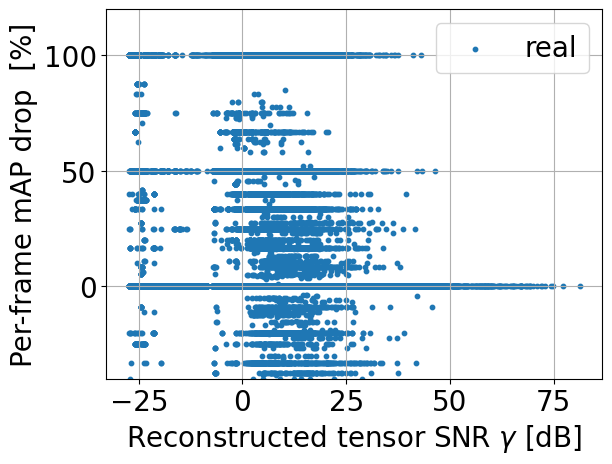

In [6]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_jpeg, map_diff_jpeg, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

In [7]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [1,2,3,4,5]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_reg = snr[np.isnan(snr) ==False]
map_diff_reg = map_diff[np.isnan(snr) ==False]
sens_diff_reg = sens_diff[np.isnan(snr) ==False]

/tmp/ipykernel_3074275/1725620258.py:20: RuntimeWarning: divide by zero encountered in divide
  map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
/tmp/ipykernel_3074275/1725620258.py:20: RuntimeWarning: invalid value encountered in divide
  map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map["map"].to_numpy() *100
/tmp/ipykernel_3074275/1725620258.py:24: RuntimeWarning: divide by zero encountered in divide
  sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100
/tmp/ipykernel_3074275/1725620258.py:24: RuntimeWarning: invalid value encountered in divide
  sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map["sensitivity"].to_numpy()*100


Text(0, 0.5, 'Per-frame mAP drop  [%]')

/home/rex/archiconda3/envs/pytorch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/rex/archiconda3/envs/pytorch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


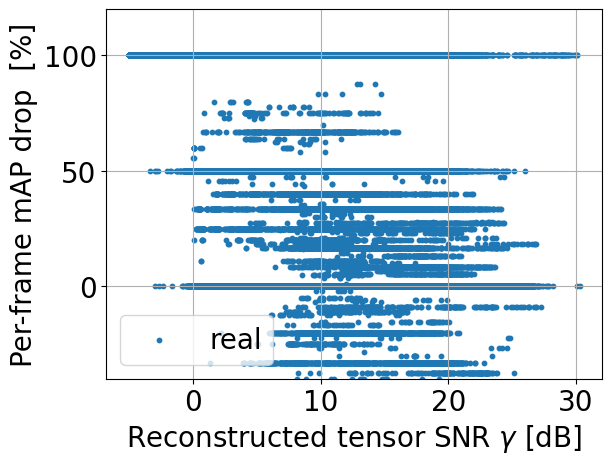

In [8]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_reg, map_diff_reg, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

In [9]:
pruning = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [2,4,6,8,10]
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map_decom["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map_decom["map"].to_numpy() *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map_decom["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map_decom["sensitivity"].to_numpy()*100
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned_decom = snr[np.isnan(snr) ==False]
map_diff_decom = map_diff[np.isnan(snr) ==False]
sens_diff_decom = sens_diff[np.isnan(snr) ==False]

/tmp/ipykernel_3074275/1534198121.py:20: RuntimeWarning: divide by zero encountered in divide
  map_des = (local_map_decom["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map_decom["map"].to_numpy() *100
/tmp/ipykernel_3074275/1534198121.py:20: RuntimeWarning: invalid value encountered in divide
  map_des = (local_map_decom["map"].to_numpy() - map_plot_df["map"].to_numpy())/local_map_decom["map"].to_numpy() *100
/tmp/ipykernel_3074275/1534198121.py:24: RuntimeWarning: divide by zero encountered in divide
  sens_des = (local_map_decom["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map_decom["sensitivity"].to_numpy()*100
/tmp/ipykernel_3074275/1534198121.py:24: RuntimeWarning: invalid value encountered in divide
  sens_des = (local_map_decom["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())/local_map_decom["sensitivity"].to_numpy()*100


Text(0, 0.5, 'Per-frame mAP drop  [%]')

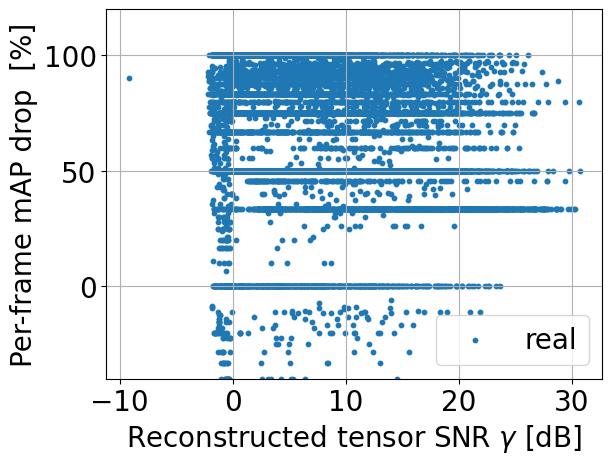

In [10]:

# plt.figure(figsize=(4,3))
plt.figure()
plt.scatter(snr_cleaned_decom, map_diff_decom, s=10,label="real")
# plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
# plt.plot(gaussian_x,log_norm_values*(75/lap0)+25,color="tab:orange",label="estimation" )
plt.legend()
plt.grid()
# plt.xlim([0, 40])
plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./map_drop.pdf")

Text(0, 0.5, 'Per-frame mAP drop  [%]')

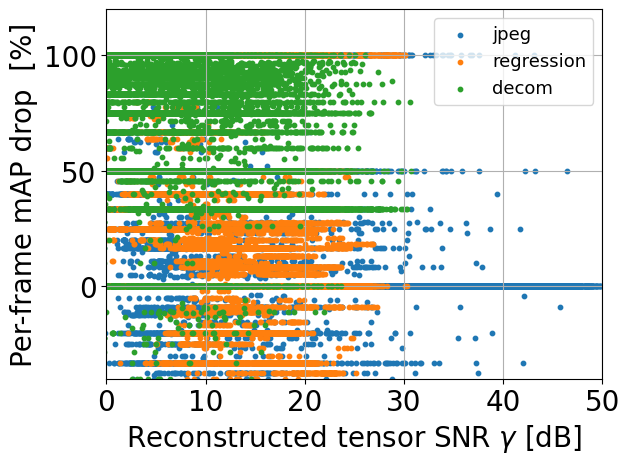

In [13]:
plt.figure()

plt.scatter(snr_cleaned_jpeg, map_diff_jpeg,s =10,label="jpeg" )
plt.scatter(snr_cleaned_reg, map_diff_reg,s=10,label="regression" )
plt.scatter(snr_cleaned_decom, map_diff_decom, s=10,label="decom" )
plt.ylim([-40,120])
plt.xlim([0,50])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")

Text(0, 0.5, 'Per-frame mAP drop  [%]')

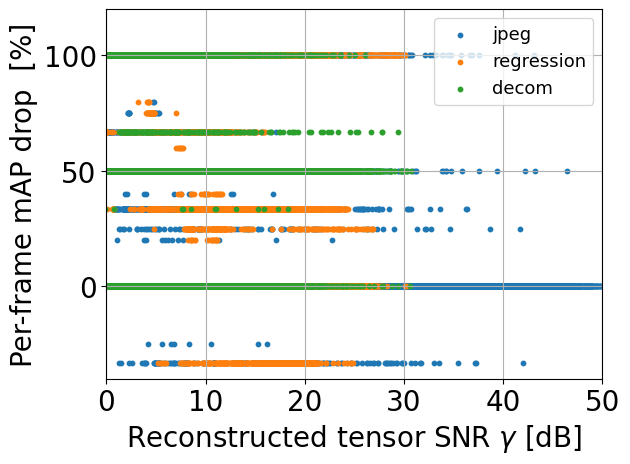

In [15]:
plt.figure()

plt.scatter(snr_cleaned_jpeg, sens_diff_jpeg,s =10,label="jpeg" )
plt.scatter(snr_cleaned_reg, sens_diff_reg,s=10,label="regression" )
plt.scatter(snr_cleaned_decom, sens_diff_decom, s=10,label="decom" )
plt.xlim([0,50])
plt.ylim([-40,120])
plt.legend(loc="upper right", fontsize=13)
plt.grid()
plt.xlabel("Reconstructed tensor SNR $\gamma$ [dB]")
plt.ylabel("Per-frame mAP drop  [%]")